In [49]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv("MERGED2012_13_PP.csv", header = 0, na_values = ["NULL","PrivacySuppressed"])

/Users/stact/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
data.head()

,﻿UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D100_L4,TRANS_4,DTRANS_4,TRANS_L4,DTRANS_L4,ICLEVEL,UGDS_MEN,UGDS_WOMEN,CDR3_DENOM,CDR2_DENOM
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,0.000000,1133.0,NaN,NaN,1,0.4879,0.5121,1405.0,1574.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,0.290236,1485.0,NaN,NaN,1,0.4200,0.5800,3153.0,3481.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,0.000000,1.0,NaN,NaN,1,0.4379,0.5621,264.0,336.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,0.307116,801.0,NaN,NaN,1,0.5425,0.4575,1208.0,1392.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,0.000000,1298.0,NaN,NaN,1,0.4046,0.5954,1951.0,1961.0


In [67]:
#only select 10 variables that interest us
data_filter = data[['\ufeffUNITID',"OPEID","MD_FAMINC", "WDRAW_DEBT_MDN" , "PREDDEG", "STABBR",
"NPT4_PUB", "NPT4_PRIV", "PAR_ED_PCT_1STGEN", "DEP_STAT_PCT_IND", "PCTFLOAN", "MD_EARN_WNE_P10", "CONTROL"]]

In [68]:
#combine netprice for public school and private school together
data_filter['NPT4_COMBINE'] =  data_filter['NPT4_PRIV']     

/Users/stact/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [69]:
data_filter.loc[data_filter['NPT4_COMBINE'].isnull(),'NPT4_COMBINE'] =  data_filter.loc[data_filter['NPT4_COMBINE'].isnull(),'NPT4_PUB']

/Users/stact/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [70]:
data_filter.drop(["NPT4_PUB","NPT4_PRIV"],axis = 1, inplace = True)

/Users/stact/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [75]:
#missing rate of each variable
data_filter.isnull().mean()*100

CampusID               0.000000
InstitutionID          0.000000
MedianFamilyIncome     3.695624
DebtNonCompleter      20.569742
PredominantDegree      0.000000
State                  0.000000
FirstGen              13.037341
IndPerc                8.982420
LoanPerc               9.649686
MDEarning10           22.366226
Control                0.000000
NetPrice              14.538689
dtype: float64

In [72]:
data_filter.columns = ['CampusID', 'InstitutionID','MedianFamilyIncome','DebtNonCompleter',
                      'PredominantDegree','State','FirstGen','IndPerc','LoanPerc','MDEarning10','Control','NetPrice']

In [78]:
corr_matrix = data_filter.corr()

In [79]:
corr_matrix["MDEarning10"]

CampusID              0.034646
InstitutionID         0.046207
MedianFamilyIncome    0.549103
DebtNonCompleter      0.458116
PredominantDegree     0.488865
FirstGen             -0.557394
IndPerc              -0.300262
LoanPerc              0.121149
MDEarning10           1.000000
Control              -0.221766
NetPrice              0.367367
Name: MDEarning10, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113f816a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113dc4358>]], dtype=object)

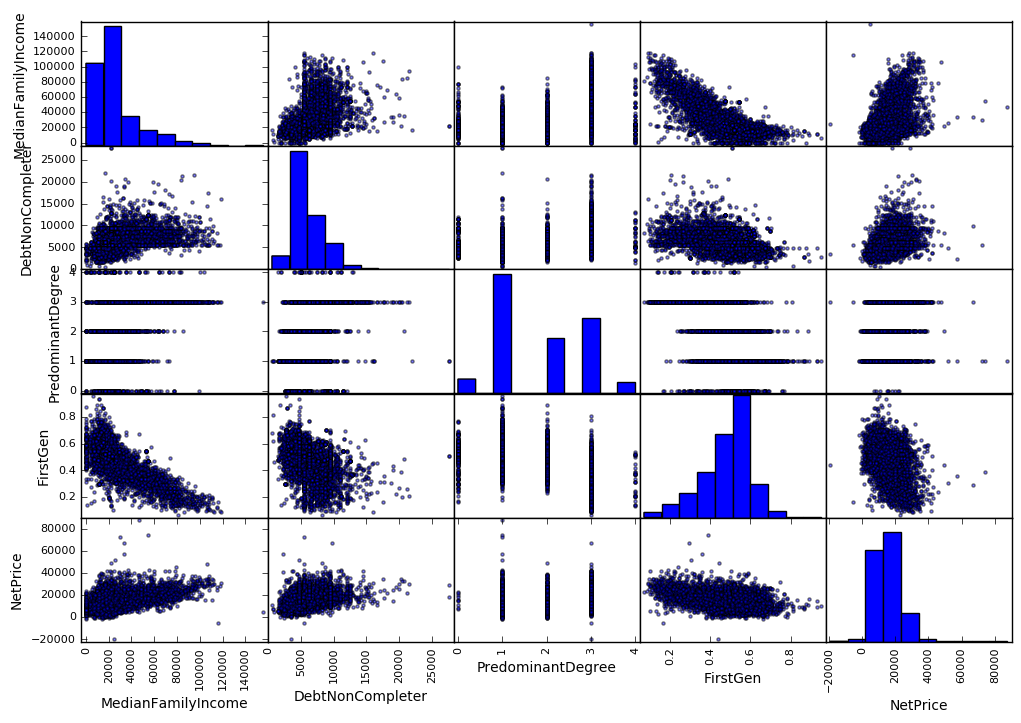

In [83]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
attributes = ['MedianFamilyIncome','DebtNonCompleter', 'PredominantDegree', 'FirstGen','NetPrice']
scatter_matrix(data_filter[attributes],figsize = (12,8))